In [1]:
import pandas as pd
import numpy as np

In [2]:
dib = pd.read_csv('diabetes_data.csv')

In [3]:
dib.shape

(768, 2)

In [4]:
dib.head()

,Blood Sugar Level,Diabetes
0,148,Yes
1,85,No
2,183,Yes
3,89,No
4,137,Yes


In [5]:
# Converting Yes to 1 and No to 0
dib['Diabetes'] = dib['Diabetes'].map({'Yes': 1, 'No': 0})

In [6]:
dib.head()

,Blood Sugar Level,Diabetes
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1


In [7]:
# Putting feature variable to X
X = dib['Blood Sugar Level']

# Putting response variable to y
y = dib['Diabetes']

In [8]:
X.shape

(768,)

In [9]:
X.head()

0    148
1     85
2    183
3     89
4    137
Name: Blood Sugar Level, dtype: int64

In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Diabetes, dtype: int64

In [11]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [12]:
y_train.head()

155    1
150    0
78     1
9      1
142    0
Name: Diabetes, dtype: int64

In [13]:
y_train.shape

(537,)

In [14]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)

# X_train.head()

In [15]:
import statsmodels.api as sm

In [16]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  537
Model:                            GLM   Df Residuals:                      535
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.47
Date:                Fri, 18 Jun 2021   Deviance:                       558.94
Time:                        07:28:55   Pearson chi2:                 1.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.5744      0.520    -10.719      0.000      -6.594      -4.555
Blood Sugar Level     0.0397      0.004      9.856      0.000       0.032       0.048
=====================================================================================
"""

In [17]:
y_train_pred = res.predict(X_train_sm)

In [18]:
y_train_pred.head()

155    0.612023
150    0.455384
78     0.406777
9      0.350842
142    0.215890
dtype: float64

In [19]:
#dib_train = pd.DataFrame()

In [20]:
#dib_train['y_train_pred'] = y_train_pred

In [21]:
#dib_train['Blood Sugar Level'] = X_train

In [22]:
#dib_train['Diabetes'] = y_train

In [23]:
#dib_train['Blood Sugar Level','Diabetes','y_train_pred'] = (X_train, y_train, y_train_pred, axis =1)

In [24]:
data = {'Blood Sugar Level':X_train, 'Diabetes':y_train, 'y_train_pred':y_train_pred}
dib_train = pd.DataFrame(data)

In [25]:
dib_train.head()

,Blood Sugar Level,Diabetes,y_train_pred
155,152,1,0.612023
150,136,0,0.455384
78,131,1,0.406777
9,125,1,0.350842
142,108,0,0.215890


In [26]:
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
dib_train.head()

,Blood Sugar Level,Diabetes,y_train_pred,Diabetes_predicted
155,152,1,0.612023,1
150,136,0,0.455384,0
78,131,1,0.406777,0
9,125,1,0.350842,0
142,108,0,0.215890,0


In [27]:
from sklearn import metrics

In [28]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(dib_train.Diabetes, dib_train.Diabetes_predicted)
print(confusion)

[[309  41]
 [ 96  91]]


In [29]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(dib_train.Diabetes, dib_train.Diabetes_predicted))

0.74487895716946


In [30]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    dib_train[i]= dib_train.y_train_pred.map(lambda x: 1 if x > i else 0)
dib_train.head()

,Blood Sugar Level,Diabetes,y_train_pred,Diabetes_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
155,152,1,0.612023,1,1,1,1,1,1,1,1,0,0,0
150,136,0,0.455384,0,1,1,1,1,1,0,0,0,0,0
78,131,1,0.406777,0,1,1,1,1,1,0,0,0,0,0
9,125,1,0.350842,0,1,1,1,1,0,0,0,0,0,0
142,108,0,0.215890,0,1,1,1,0,0,0,0,0,0,0


In [31]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(dib_train.Diabetes, dib_train[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.348231     1.000000     0.000000
0.1          0.1  0.432030     0.983957     0.137143
0.2          0.2  0.618250     0.898396     0.468571
0.3          0.3  0.718808     0.754011     0.700000
0.4          0.4  0.744879     0.604278     0.820000
0.5          0.5  0.744879     0.486631     0.882857
0.6          0.6  0.743017     0.390374     0.931429
0.7          0.7  0.739292     0.304813     0.971429
0.8          0.8  0.694600     0.155080     0.982857
0.9          0.9  0.655493     0.016043     0.997143


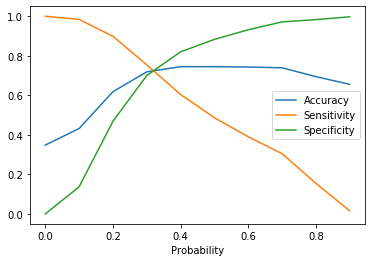

In [32]:
import matplotlib.pyplot as plt
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

Optimum probability value = 0.35

In [33]:
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.32 else 0)

# Let's see the head
dib_train.head(30)

,Blood Sugar Level,Diabetes,y_train_pred,Diabetes_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
155,152,1,0.612023,1,1,1,1,1,1,1,1,0,0,0
150,136,0,0.455384,1,1,1,1,1,1,0,0,0,0,0
78,131,1,0.406777,1,1,1,1,1,1,0,0,0,0,0
9,125,1,0.350842,1,1,1,1,1,0,0,0,0,0,0
142,108,0,0.215890,0,1,1,1,0,0,0,0,0,0,0
321,112,1,0.243960,0,1,1,1,0,0,0,0,0,0,0
580,151,1,0.602562,1,1,1,1,1,1,1,1,0,0,0
75,0,0,0.003779,0,1,0,0,0,0,0,0,0,0,0
29,117,0,0.282372,0,1,1,1,0,0,0,0,0,0,0
169,111,0,0.236718,0,1,1,1,0,0,0,0,0,0,0


In [34]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(dib_train.Diabetes, dib_train.Diabetes_predicted))

0.7281191806331471


In [35]:
# Confusion matrix 
confusion_train = metrics.confusion_matrix(dib_train.Diabetes, dib_train.Diabetes_predicted)
print(confusion_train)

[[253  97]
 [ 49 138]]


In [36]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [37]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7379679144385026

In [38]:
# Let us calculate specificity
TN / float(TN+FP)

0.7228571428571429

In [39]:
X_test_sm = sm.add_constant(X_test)

In [40]:
y_test_pred = res.predict(X_test_sm)

In [41]:
dib_test = pd.DataFrame()

In [42]:
dib_test['y_test_pred'] = y_test_pred

In [43]:
dib_test['Blood Sugar Level'] = X_test

In [44]:
dib_test['Diabetes'] = y_test

In [45]:
dib_test.head()

,y_test_pred,Blood Sugar Level,Diabetes
173,0.080152,79,0
253,0.103162,86,0
207,0.701102,162,1
737,0.047620,65,0
191,0.332991,123,0


In [46]:
dib_test['Diabetes_predicted'] = dib_test.y_test_pred.map(lambda x: 1 if x > 0.32 else 0)

In [47]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(dib_test.Diabetes, dib_test.Diabetes_predicted))

0.658008658008658


In [48]:
# Confusion matrix 
confusion_test = metrics.confusion_matrix(dib_test.Diabetes, dib_test.Diabetes_predicted)
print(confusion_test)

[[97 53]
 [26 55]]


In [49]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [50]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6790123456790124

In [51]:
# Let us calculate specificity
TN / float(TN+FP)

0.6466666666666666